In [194]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly_express as px 
py.init_notebook_mode()
import plotly.graph_objs as go

In [213]:
data = pd.read_csv('Clean_data.csv')

In [214]:
data.head()

Education Marital_Status   Income  Recency  MntGoldProds  \
0  Undergraduate         Single  58138.0       58            88   
1  Undergraduate         Single  46344.0       38             6   
2  Undergraduate         Couple  71613.0       26            42   
3  Undergraduate         Couple  26646.0       26             5   
4   Postgraduate         Couple  58293.0       94            15   

   NumWebVisitsMonth  Complain  Response  Age  Offspring  Num_Food  \
0                  7         0         1   64          0      1529   
1                  5         0         0   67          2        21   
2                  4         0         0   56          0       734   
3                  6         0         0   37          1        48   
4                  5         0         0   40          1       407   

   Num_Purchases  Total_AcceptedCmp  Years_Spent_Com  
0             25                  0                9  
1              6                  0                7  
2             21                  0                8  
3              8                  0                7  
4             19                  0                7

In [9]:
dum_df = pd.get_dummies(data.Education)
data = data.join(dum_df)
data.drop('Education',axis=1,inplace=True)
data.head()

Marital_Status   Income  Recency  MntGoldProds  NumWebVisitsMonth  Complain  \
0         Single  58138.0       58            88                  7         0   
1         Single  46344.0       38             6                  5         0   
2         Couple  71613.0       26            42                  4         0   
3         Couple  26646.0       26             5                  6         0   
4         Couple  58293.0       94            15                  5         0   

   Response  Age  Offspring  Num_Food  Num_Purchases  Total_AcceptedCmp  \
0         1   64          0      1529             25                  0   
1         0   67          2        21              6                  0   
2         0   56          0       734             21                  0   
3         0   37          1        48              8                  0   
4         0   40          1       407             19                  0   

   Years_Spent_Com  Basic  Postgraduate  Undergraduate  
0                9      0             0              1  
1                7      0             0              1  
2                8      0             0              1  
3                7      0             0              1  
4                7      0             1              0

In [10]:
data.Marital_Status.replace({'Single':0,'Couple':1},inplace=True)
data.Marital_Status.unique()

array([0, 1], dtype=int64)

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [115]:
new_data = pd.DataFrame(scaled_data,columns=data.columns) 

In [116]:
new_data.tail()

Marital_Status    Income   Recency  MntGoldProds  NumWebVisitsMonth  \
2235        0.742460  0.358568 -0.107383      3.891766          -0.130463   
2236        0.742460  0.470064  0.237969     -0.690659           0.693904   
2237       -1.346874  0.189106  1.446700     -0.383886           0.281720   
2238        0.742460  0.679035 -1.419719      0.325527          -0.954831   
2239        0.742460  0.024838 -0.314594     -0.441406           0.693904   

      Complain  Response       Age  Offspring  Num_Food  Num_Purchases  \
2235 -0.097282 -0.418612  0.150717   0.065928  0.923222       0.408829   
2236 -0.097282 -0.418612  1.903435   2.726794 -0.218178       0.929970   
2237 -0.097282 -0.418612 -1.017761  -1.264505  1.136584       0.539114   
2238 -0.097282 -0.418612  1.068807   0.065928  0.382011       1.060255   
2239 -0.097282  2.388846  1.235733   1.396361 -0.712553      -0.503169   

      Total_AcceptedCmp  Years_Spent_Com     Basic  Postgraduate  \
2235          -0.439037         0.041094 -0.157171     -0.786446   
2236           1.035390        -1.420036 -0.157171      1.271543   
2237           1.035390        -1.420036 -0.157171     -0.786446   
2238          -0.439037        -1.420036 -0.157171      1.271543   
2239          -0.439037         1.502225 -0.157171      1.271543   

      Undergraduate  
2235       0.827170  
2236      -1.208941  
2237       0.827170  
2238      -1.208941  
2239      -1.208941

#### number of clusters was concluded to be two using the silhouette_score to compare the performance of 1-10 clusters

In [184]:
classifier = KMeans(n_clusters=2,random_state=99)

In [185]:
result = classifier.fit_predict(data)

In [188]:
new_data.head()

Marital_Status    Income   Recency  MntGoldProds  NumWebVisitsMonth  \
0       -1.346874  0.235327  0.307039      0.843207           0.693904   
1       -1.346874 -0.235826 -0.383664     -0.729006          -0.130463   
2        0.742460  0.773633 -0.798086     -0.038766          -0.542647   
3        0.742460 -1.022732 -0.798086     -0.748179           0.281720   
4        0.742460  0.241519  1.550305     -0.556446          -0.130463   

   Complain  Response       Age  Offspring  Num_Food  Num_Purchases  \
0 -0.097282  2.388846  0.985345  -1.264505  1.677795       1.320826   
1 -0.097282 -0.418612  1.235733   1.396361 -0.938058      -1.154596   
2 -0.097282 -0.418612  0.317643  -1.264505  0.298748       0.799685   
3 -0.097282 -0.418612 -1.268149   0.065928 -0.891222      -0.894025   
4 -0.097282 -0.418612 -1.017761   0.065928 -0.268483       0.539114   

   Total_AcceptedCmp  Years_Spent_Com     Basic  Postgraduate  Undergraduate  
0          -0.439037         1.502225 -0.157171     -0.786446       0.827170  
1          -0.439037        -1.420036 -0.157171     -0.786446       0.827170  
2          -0.439037         0.041094 -0.157171     -0.786446       0.827170  
3          -0.439037        -1.420036 -0.157171     -0.786446       0.827170  
4          -0.439037        -1.420036 -0.157171      1.271543      -1.208941

#### PCA is used to reduce the dimensionality of the dataset

In [161]:
pca = PCA(3)
df = pca.fit_transform(new_data)

In [162]:
df.shape

(2240, 3)

In [163]:
df = pd.DataFrame(df)

In [164]:
df.head()

0         1         2
0  2.343929 -1.095138 -2.075109
1 -1.751672 -0.578444  1.194167
2  1.144186 -1.080732  0.733833
3 -1.958549 -1.143483  0.434016
4 -0.276280  1.592450  1.339930

#### Visualisation of the dataset

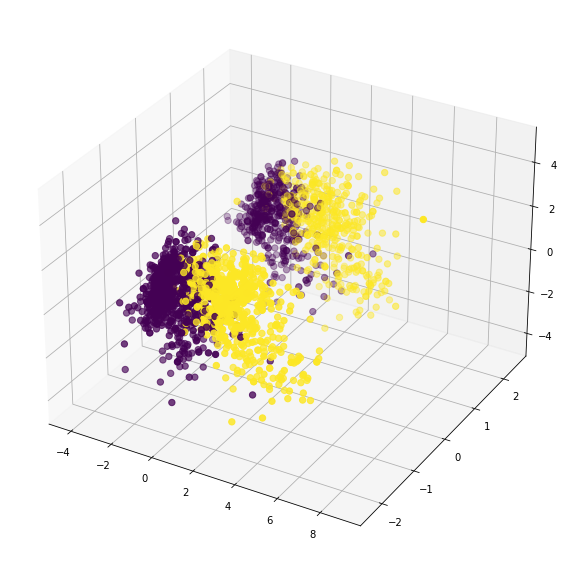

In [191]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d',label='bla')
ax.scatter(df[0],df[1],df[2], s=40, c=result, marker='o')
plt.show()

In [215]:
data['Cluster'] = result

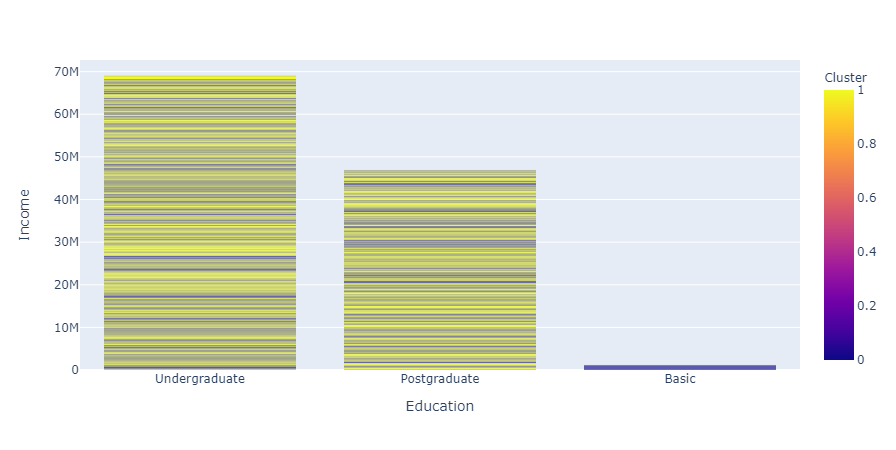

In [222]:
fig = px.bar(data, x='Education', y= 'Income', color='Cluster')
fig.update_traces(marker_line = dict(width=0))
fig.show()

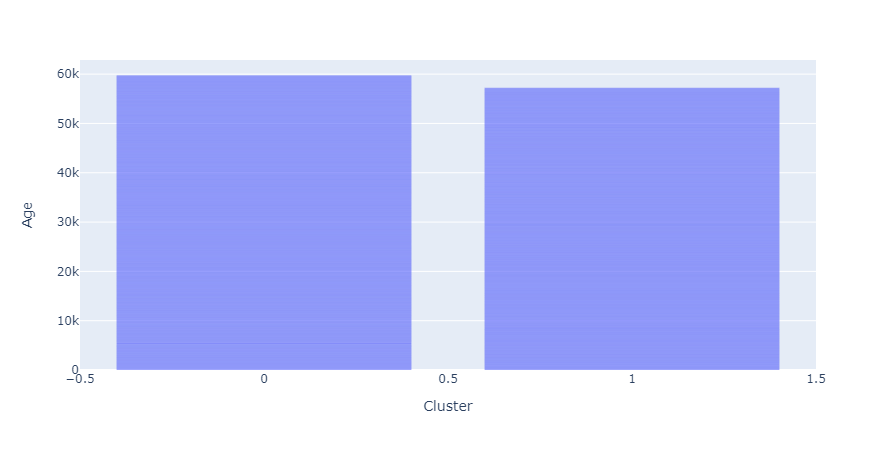

In [219]:
fig = px.bar(data, x='Cluster', y= 'Age')
fig.update_traces(marker_line = dict(width=0))
fig.show()

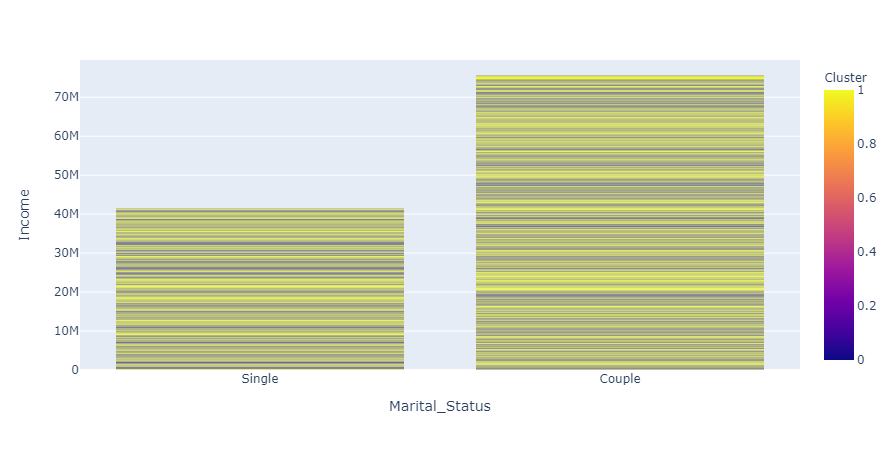

In [221]:
fig = px.bar(data, x='Marital_Status', y= 'Income', color='Cluster')
fig.update_traces(marker_line = dict(width=0))
fig.show()

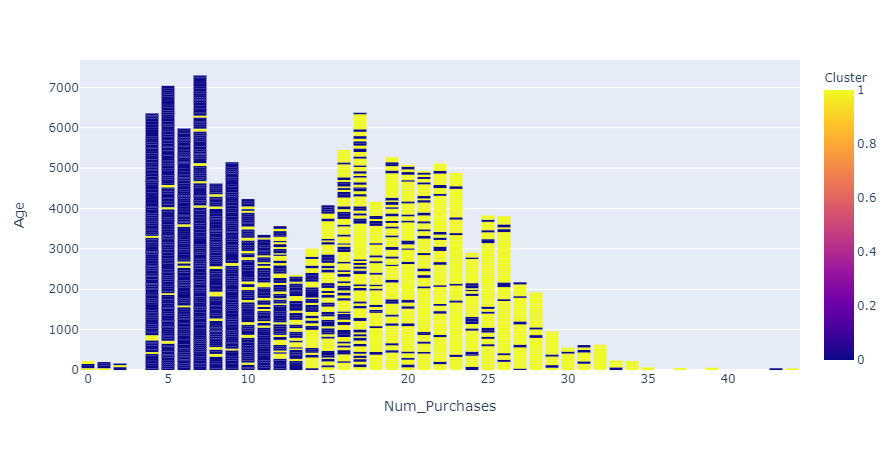

In [208]:
fig = px.bar(data, x='Num_Purchases', y= 'Age', color='Cluster')
fig.update_traces(marker_line = dict(width=0))
fig.show()

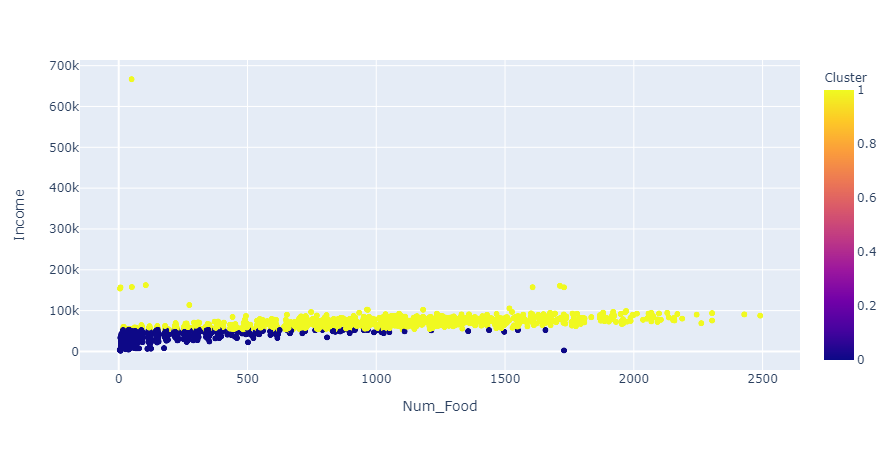

In [203]:
fig = px.scatter(data, x='Num_Food', y= 'Income', color='Cluster')
fig.update_traces(marker_line = dict(width=0))
fig.show()

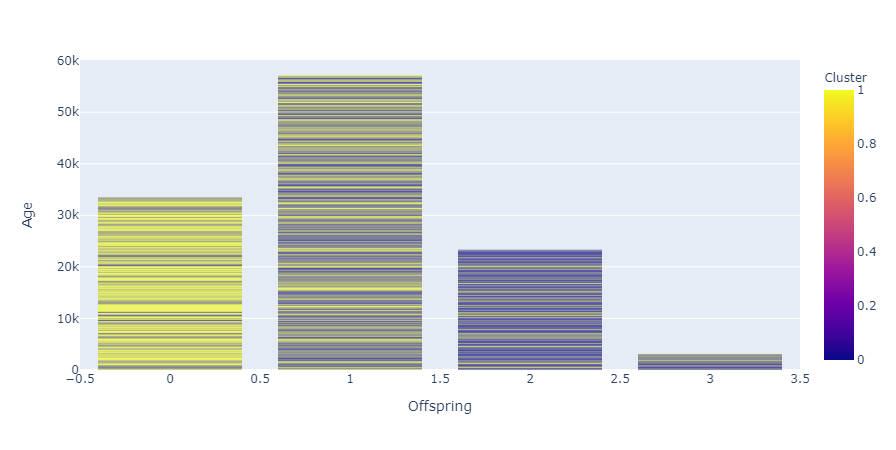

In [210]:
fig = px.bar(data, x='Offspring', y= 'Age', color='Cluster')
fig.update_traces(marker_line = dict(width=0))
fig.show()

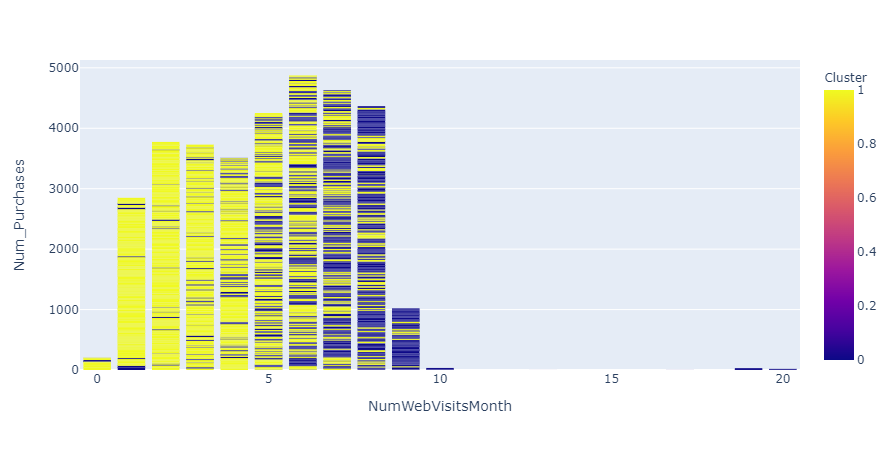

In [206]:
fig = px.bar(data, x='NumWebVisitsMonth', y= 'Num_Purchases',color='Cluster')
fig.update_traces(marker_line = dict(width=0))
fig.show()

# Conclusion
## Customer Personalities are classified into two main personalities
### Segement 1
- They visit the web platform a little
- They purchase the most amount of goods from our company
- They usually have little or no kids at home
- They seem to also make more money
- They are well educated with a Undergraduate degree atleast

### Segement 2
- They visit the web platform a lot
- They purchase goods from us less
- They have usually have kids at home
- They make much lesser income
- They are educated with a basic cert atleast and usually with a undergraduate degree
#### We can then conclude that the first segement are Wealthy Sophisticated People, while the second segement are Average People of the society.


